In [88]:
from astropy.io import fits
from astropy.nddata import NDData, CCDData, Cutout2D
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from os import path
import os

acv_cat = fits.open('field_cat.fits')
data_cat = acv_cat[1].data

In [89]:
# 从header文件获取波段信息
band_list = []
for i in range(8, 20):
    band_list.append(acv_cat[1].header["TTYPE%d"%i])
print(band_list)

['F140W', 'CLEAR1L_F814W', 'F125W', 'F160W', 'F606W_CLEAR2L', 'CLEAR1L_F435W', 'F110W', 'F105W', 'F775W_CLEAR2L', 'F475W_CLEAR2L', 'F606W', 'F850LP_CLEAR2L']


In [139]:
loss = 0
for source_id in range(118):
    skyCoord = SkyCoord(data_cat[source_id][1], data_cat[source_id][2], unit='deg')
    for band in band_list:
        if data_cat[source_id][band] != 'nan':
            file_path = path.join('dataset_all', data_cat[source_id][band])
            with fits.open(path.join(file_path, os.listdir(file_path)[0])) as image:
                wcs = WCS(image[1].header)
                position = wcs.world_to_pixel(skyCoord)
                ccd = CCDData(image[1].data, unit='adu')
                # 当坐标不在图上时跳过，同时记录跳过的总数
                if position[0] < 0 or position[1] < 0 or position[0] > ccd.shape[0] or position[1] > ccd.shape[1]:
                    print("!source not on the image! skipping...")
                    loss = loss + 1
                    break
                cutout = Cutout2D(ccd, position, size=50)
                outccd = CCDData(cutout.data, unit='adu')
                fname = '%03d'%source_id + '_archival_'+ band + '.fits'
                outccd.write(path.join('cutouts', fname))
                print('%d source successfully cut...'%source_id)

0 source successfully cut...
0 source successfully cut...
1 source successfully cut...
1 source successfully cut...
1 source successfully cut...
1 source successfully cut...
1 source successfully cut...
2 source successfully cut...
2 source successfully cut...
2 source successfully cut...
3 source successfully cut...
3 source successfully cut...
4 source successfully cut...
5 source successfully cut...
5 source successfully cut...
6 source successfully cut...
6 source successfully cut...
7 source successfully cut...
7 source successfully cut...
8 source successfully cut...
8 source successfully cut...
9 source successfully cut...
10 source successfully cut...
11 source successfully cut...
11 source successfully cut...
12 source successfully cut...
13 source successfully cut...
13 source successfully cut...
14 source successfully cut...
14 source successfully cut...
14 source successfully cut...
14 source successfully cut...
15 source successfully cut...
15 source successfully cut...
16

In [140]:
loss

20

In [141]:
data_cat[50]

(50, 149.91064, 2.5546801, 0.75265378, 8.9143667, 0.1188727, 0.1188727, 'nan', 'J8PU5M010', 'nan', 'IEDW9PFPQ', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan')

(array(309.83676853), array(-298.96567505))
(959, 1083)


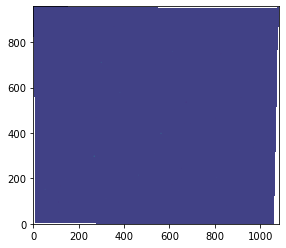

In [145]:
with fits.open('dataset_all/IEDW9PFPQ/iedw9pfpq_drz.fits') as image:
    wcs = WCS(image[1].header)
    skyCoord = SkyCoord(data_cat[50][1], data_cat[50][2], unit='deg')
    pixel_position = wcs.world_to_pixel(skyCoord)
    print(pixel_position)
    ccd = CCDData(image[1].data, unit='adu')
    print(ccd.shape)
    plt.imshow(ccd, origin='lower')